## Options Pricing
This notebook is an investigation of the Black Scholes Merton options pricing model, it also includes a comparison of the deterministic solution to a monte carlo simulated one. The goal of this notebook was to further understand the black scholes model PDE with by doing a partial derivation as well as analyzing the the sensitivity to an options price given different parameters.

### Black Scholes Model PDE Derivation
This derivation follows the steps of [this notebook](https://github.com/romanmichaelpaolucci/Quant-Guild-Library/blob/main/2025%20Video%20Lectures/19.%20Monte%20Carlo%20Simulation%20and%20Black-Scholes%20for%20Pricing%20Options/montecarlo_blackshcoles.ipynb), mainly copied for the purpose of trying to understand its derivation.
The black scholes models states that the price of the stock follows a Geometric Brownian motion, which just means that for a stock at time $S_t$, 
$$
dS_t = rS_tdt + \sigma S_tdW_t
$$
where $r$ is the risk free rate, $\sigma$ is the volatility, and $W_t$ is the standard Brownian motion.


*Derivation*

Let $\Pi$ denote a portfolio where we are long on a stock $S$ through a derivative while simultaneously being short its shares. Call $V(S,t)$ the value of the call option and $\nabla$ the number of shares we are short on the stock. The value of the portfolio is then
$$
\Pi = V(s,t) - \nabla S
$$
The change in the portfolio value is then
$$
d\Pi = dV - \nabla dS
$$
Using Itô's Lemma (Chain rule for Stochastic Calculus), we get that the change in value is
$$
dV = \frac{\partial V}{\partial t} dt +\frac{\partial V}{\partial S} dS + \frac{1}{2}\frac{\partial^2 V}{\partial S^2}(dS)^2
$$
Substituting $dS = rSdt + \sigma SdW$ and $(dS)^2 = \sigma^2 S^2 dt$ (not sure where the second quantity comes from) 
$$
d\Pi = \left(\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}\right)dt + \left(\frac{\partial V}{\partial S} - \nabla\right)dS
$$
Choose $\nabla = \frac{\partial V}{\partial S}$ (delta hedging) to eliminate risk. Since we have no risk and assumed no-arbitrage then this implies that the portfolio must earn the risk free rate
$$
d\Pi = r\Pi dt
$$
which yields the Black-Scholes PDE
$$
\frac{\partial V}{\partial t} + r S \frac{\partial V}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} = rV
$$
Which has the closed form solution
$$
C(S_0, K, T) = S_0 \Phi(d_1) - Ke^{-rT} \Phi(d_2)
$$
where
$$
\begin{align}
d_1 &= \frac{ln(S_0/K) + (r+\sigma^2/2)T}{\sigma \sqrt{T}} \\
d_2 &= d_1 - \sigma\sqrt{T}
\end{align}
$$
and $\Phi$ is the standard normal cumulative distribution function.

An interactive plot of the black scholes pricing model for different input parameters.

<>:60: SyntaxWarning: invalid escape sequence '\s'
<>:60: SyntaxWarning: invalid escape sequence '\s'
/var/folders/8b/8xv60sm9601dqdzch7jd5lsr0000gn/T/ipykernel_81372/425663475.py:60: SyntaxWarning: invalid escape sequence '\s'
  axs[0, 1].set_title('Price vs. Volatility ($\sigma$)')


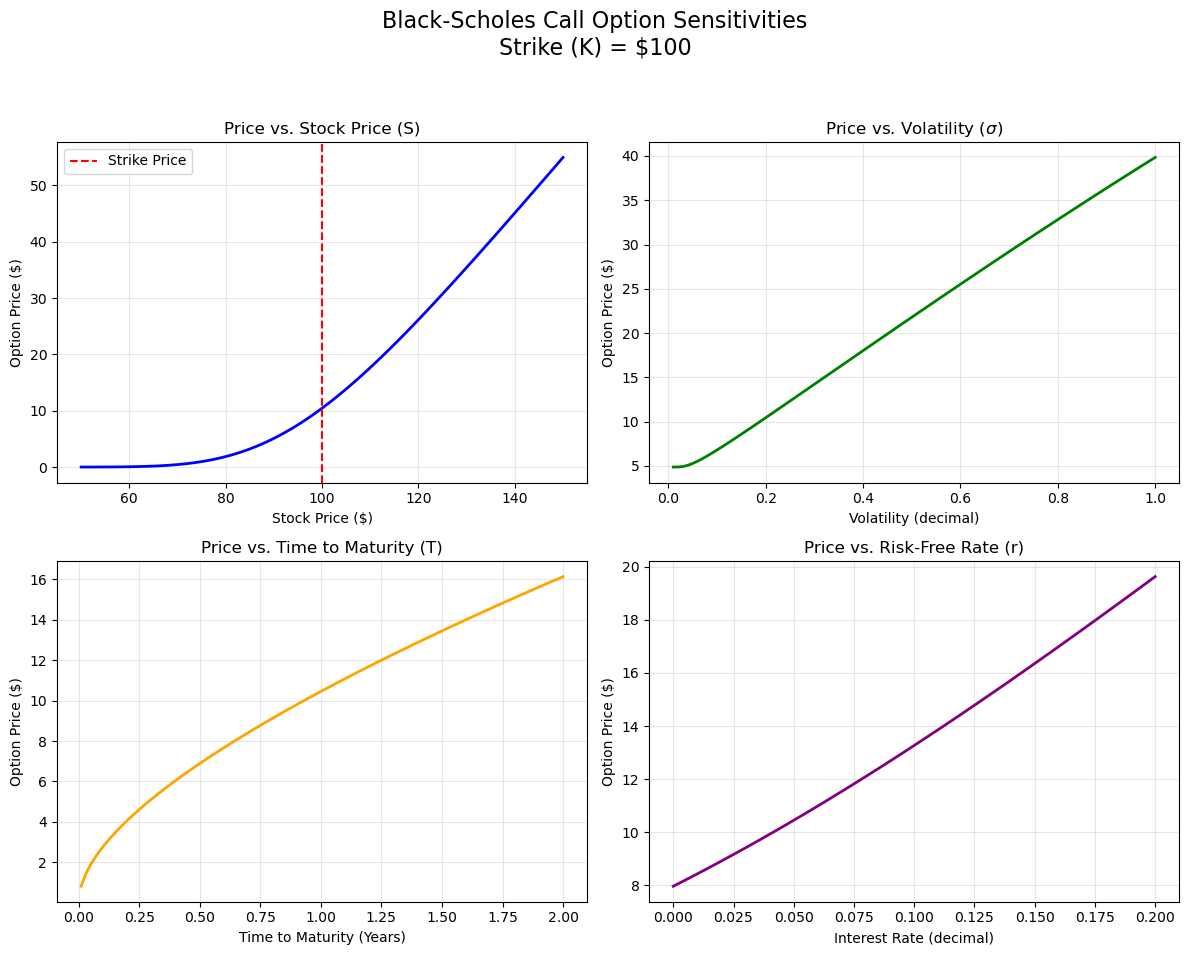

In [4]:
# Code provided by Gemini
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Computes the Black-Scholes price for a European option.
    
    Parameters:
    S : float or array - Current stock price
    K : float - Strike price
    T : float - Time to maturity (in years)
    r : float - Risk-free interest rate (decimal, e.g., 0.05 for 5%)
    sigma : float - Volatility (decimal, e.g., 0.2 for 20%)
    option_type : str - 'call' or 'put'
    """
    # Prevent division by zero if T is 0 (at expiration)
    # We use a very small number if T is 0 for plotting stability
    T = np.maximum(T, 1e-10)
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        
    return price

# --- BASE PARAMETERS ---
S_base = 100    # Base Stock Price
K_base = 100    # Base Strike Price
T_base = 1.0    # 1 Year to Maturity
r_base = 0.05   # 5% Risk-Free Rate
sigma_base = 0.2 # 20% Volatility

# --- PLOTTING SETUP ---
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle(f'Black-Scholes Call Option Sensitivities\nStrike (K) = ${K_base}', fontsize=16)

# 1. Price vs Underlying Stock Price (Delta)
S_range = np.linspace(50, 150, 100)
prices_S = black_scholes(S_range, K_base, T_base, r_base, sigma_base, 'call')

axs[0, 0].plot(S_range, prices_S, color='blue', linewidth=2)
axs[0, 0].set_title('Price vs. Stock Price (S)')
axs[0, 0].set_xlabel('Stock Price ($)')
axs[0, 0].set_ylabel('Option Price ($)')
axs[0, 0].grid(True, alpha=0.3)
axs[0, 0].axvline(K_base, color='red', linestyle='--', label='Strike Price')
axs[0, 0].legend()

# 2. Price vs Volatility (Vega)
sigma_range = np.linspace(0.01, 1.0, 100) # 1% to 100% vol
prices_sigma = black_scholes(S_base, K_base, T_base, r_base, sigma_range, 'call')

axs[0, 1].plot(sigma_range, prices_sigma, color='green', linewidth=2)
axs[0, 1].set_title('Price vs. Volatility ($\sigma$)')
axs[0, 1].set_xlabel('Volatility (decimal)')
axs[0, 1].set_ylabel('Option Price ($)')
axs[0, 1].grid(True, alpha=0.3)

# 3. Price vs Time to Maturity (Theta)
T_range = np.linspace(0.01, 2.0, 100) # 0 to 2 years
# Note: Usually we look at time DECAY (reverse T), but here we plot Price vs Time Remaining.
prices_T = black_scholes(S_base, K_base, T_range, r_base, sigma_base, 'call')

axs[1, 0].plot(T_range, prices_T, color='orange', linewidth=2)
axs[1, 0].set_title('Price vs. Time to Maturity (T)')
axs[1, 0].set_xlabel('Time to Maturity (Years)')
axs[1, 0].set_ylabel('Option Price ($)')
axs[1, 0].grid(True, alpha=0.3)

# 4. Price vs Risk-Free Rate (Rho)
r_range = np.linspace(0.0, 0.20, 100) # 0% to 20% rates
prices_r = black_scholes(S_base, K_base, T_base, r_range, sigma_base, 'call')

axs[1, 1].plot(r_range, prices_r, color='purple', linewidth=2)
axs[1, 1].set_title('Price vs. Risk-Free Rate (r)')
axs[1, 1].set_xlabel('Interest Rate (decimal)')
axs[1, 1].set_ylabel('Option Price ($)')
axs[1, 1].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Finding the solution to that PDE is difficult, instead we could try simulating using Monte Carlo to find the approximate solution to 
$$
C(S_0, K, T) = e^{-rT}\mathbb{E}^\mathbb{Q}[max(S_T - K, 0)]
$$

Assume that under risk-normal measure, the terminal stock price $S_T$ follows a log-normal distribution:
$$
S_T = S_0 \exp((r-\frac{1}{2}\sigma^2)T + \sigma \sqrt{T} Z)
$$
where $Z \sim N(0,1)$ is a standard normal variable

/var/folders/8b/8xv60sm9601dqdzch7jd5lsr0000gn/T/ipykernel_81372/1767135360.py:11: RuntimeWarning: invalid value encountered in divide
  running_std = np.sqrt(np.cumsum((payoffs - running_mean)**2) / (simulation_indexes - 1))


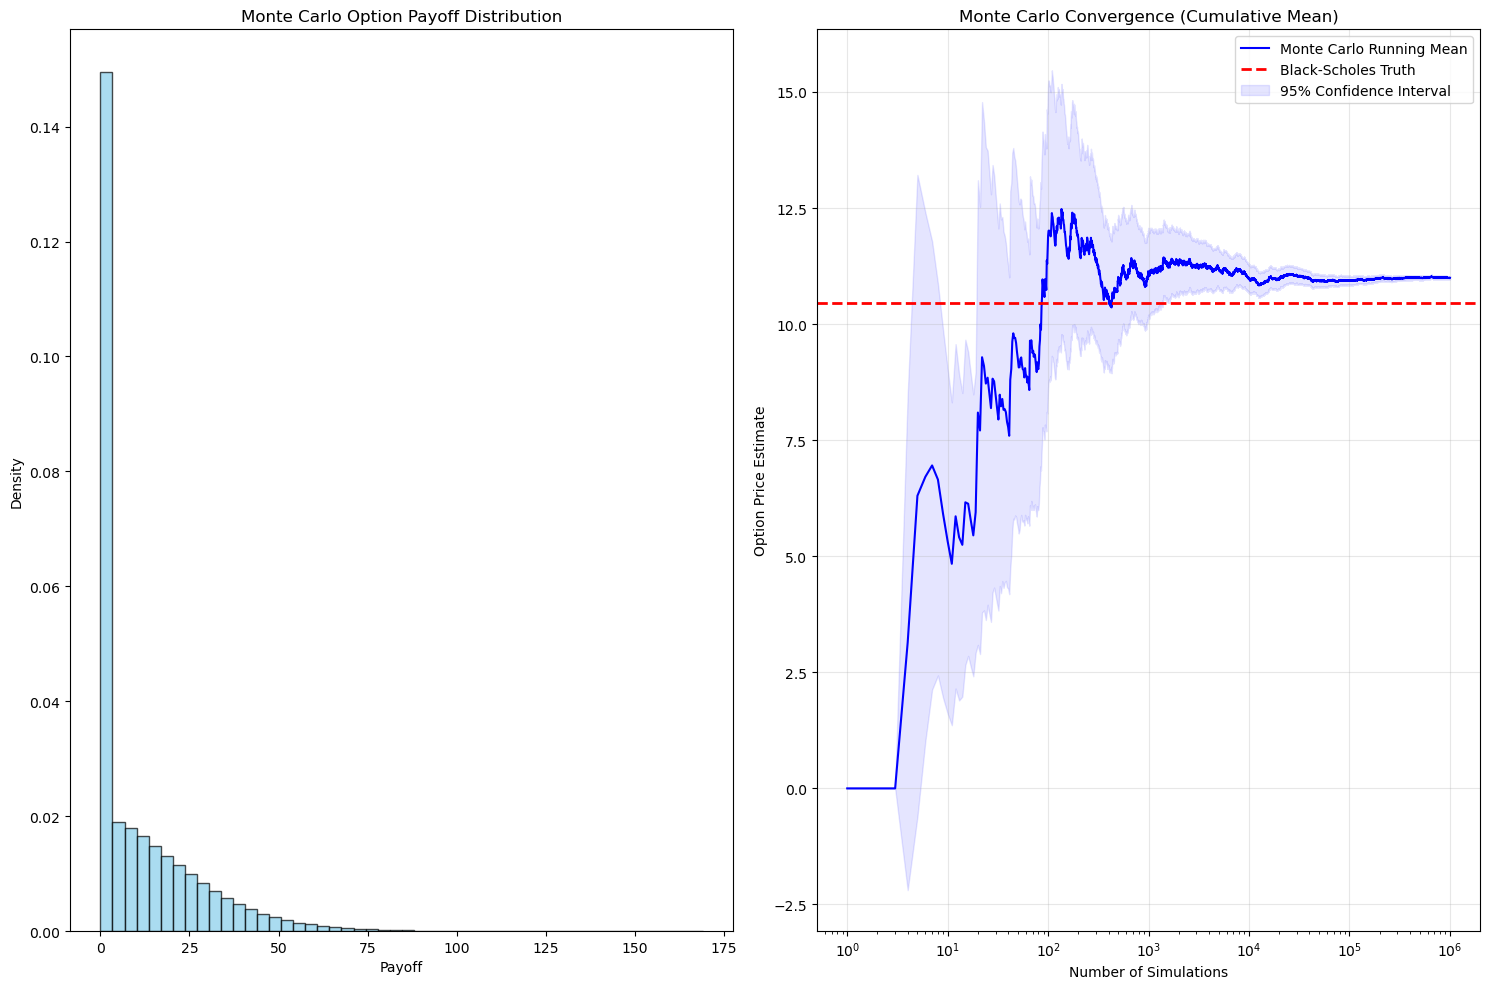

In [15]:
n_simulations = 1_000_000
S0, K, T, r, sigma = 100, 100, 1, 0.05, 0.2
Z = np.random.standard_normal(n_simulations)
ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
payoffs = np.maximum(ST - K, 0)
black_scholes_price = black_scholes(S0, K, T, r, sigma)

simulation_indexes = np.arange(1, n_simulations + 1)
running_mean = np.cumsum(payoffs) / simulation_indexes

running_std = np.sqrt(np.cumsum((payoffs - running_mean)**2) / (simulation_indexes - 1))
running_std[0] = 0 
standard_error = running_std / np.sqrt(simulation_indexes)
upper_bound = running_mean + 1.96 * standard_error
lower_bound = running_mean - 1.96 * standard_error

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

ax1.hist(payoffs, bins=50, color='skyblue', edgecolor='black', density=True, alpha=0.7)
ax1.set_title('Monte Carlo Option Payoff Distribution')
ax1.set_xlabel('Payoff')
ax1.set_ylabel('Density')

start_idx = 0 

ax2.semilogx(simulation_indexes[start_idx:], running_mean[start_idx:], 
         color='blue', lw=1.5, label='Monte Carlo Running Mean')
ax2.axhline(black_scholes_price, color='red', linestyle='--', lw=2, label='Black-Scholes Truth')

# Add the "Confidence Funnel"
ax2.fill_between(simulation_indexes[start_idx:], 
                 lower_bound[start_idx:], 
                 upper_bound[start_idx:], 
                 color='blue', alpha=0.1, label='95% Confidence Interval')

ax2.set_title("Monte Carlo Convergence (Cumulative Mean)")
ax2.set_xlabel("Number of Simulations")
ax2.set_ylabel("Option Price Estimate")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()